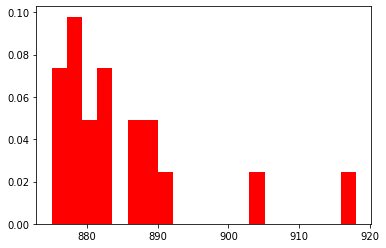

Arithmetic Mean : 884.8578947368422

Sample Weighted Mean : 879.9724169668511

Median : 881.5

Error in Weighted Mean : 0.3920640956256396

SigmaG : 7.338880981602713

Error in Medain : 2.347466551990298

p_value : 0.0004993404145352542


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from astroML.stats import sigmaG
from operator import add

# Reading the data from local computer
data = pd.read_csv('data.txt', sep = ' ')
lifetime = np.array(data['Lifetime'])
statError = np.array(data['StatError'])
systError = np.array(data['SystError'])
Error = np.sqrt(statError**2 + systError**2)

# Histogram plot of the measurements (lifetime)
plt.hist(lifetime, bins = 20, density = True, color = 'red', ls = 'solid', label = 'sigmaG(median)')
plt.show()

# Arithmetic Mean
print('Arithmetic Mean :', np.mean(lifetime))

# Sample Weighted Mean
weight, num, den = (0, 0, 0)
for i in range(len(lifetime)):
    weight = (1/(Error[i] * Error[i]))
    num = num + (weight * lifetime[i])
    den = den + weight

print('\nSample Weighted Mean :', num/den)

# Sample Median
print('\nMedian :', np.median(lifetime))

# Error in Weighted Mean
print('\nError in Weighted Mean :', np.sqrt(1/den))

# SigmaG of measurements
print('\nSigmaG :', sigmaG(lifetime))

# Error in Median 68% confidence interval (1 sigma error)
print('\nError in Medain :', np.std(lifetime)/np.sqrt(len(lifetime)))

# Shapiro-Wilks Test
W1, p_value = stats.shapiro(lifetime)
print('\np_value :', p_value)

